In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, datasets , models


2024-05-16 03:02:40.669362: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 03:02:40.677663: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 03:02:40.782817: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 03:02:43.306201: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()


/tmp/ipykernel_186867/260140420.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


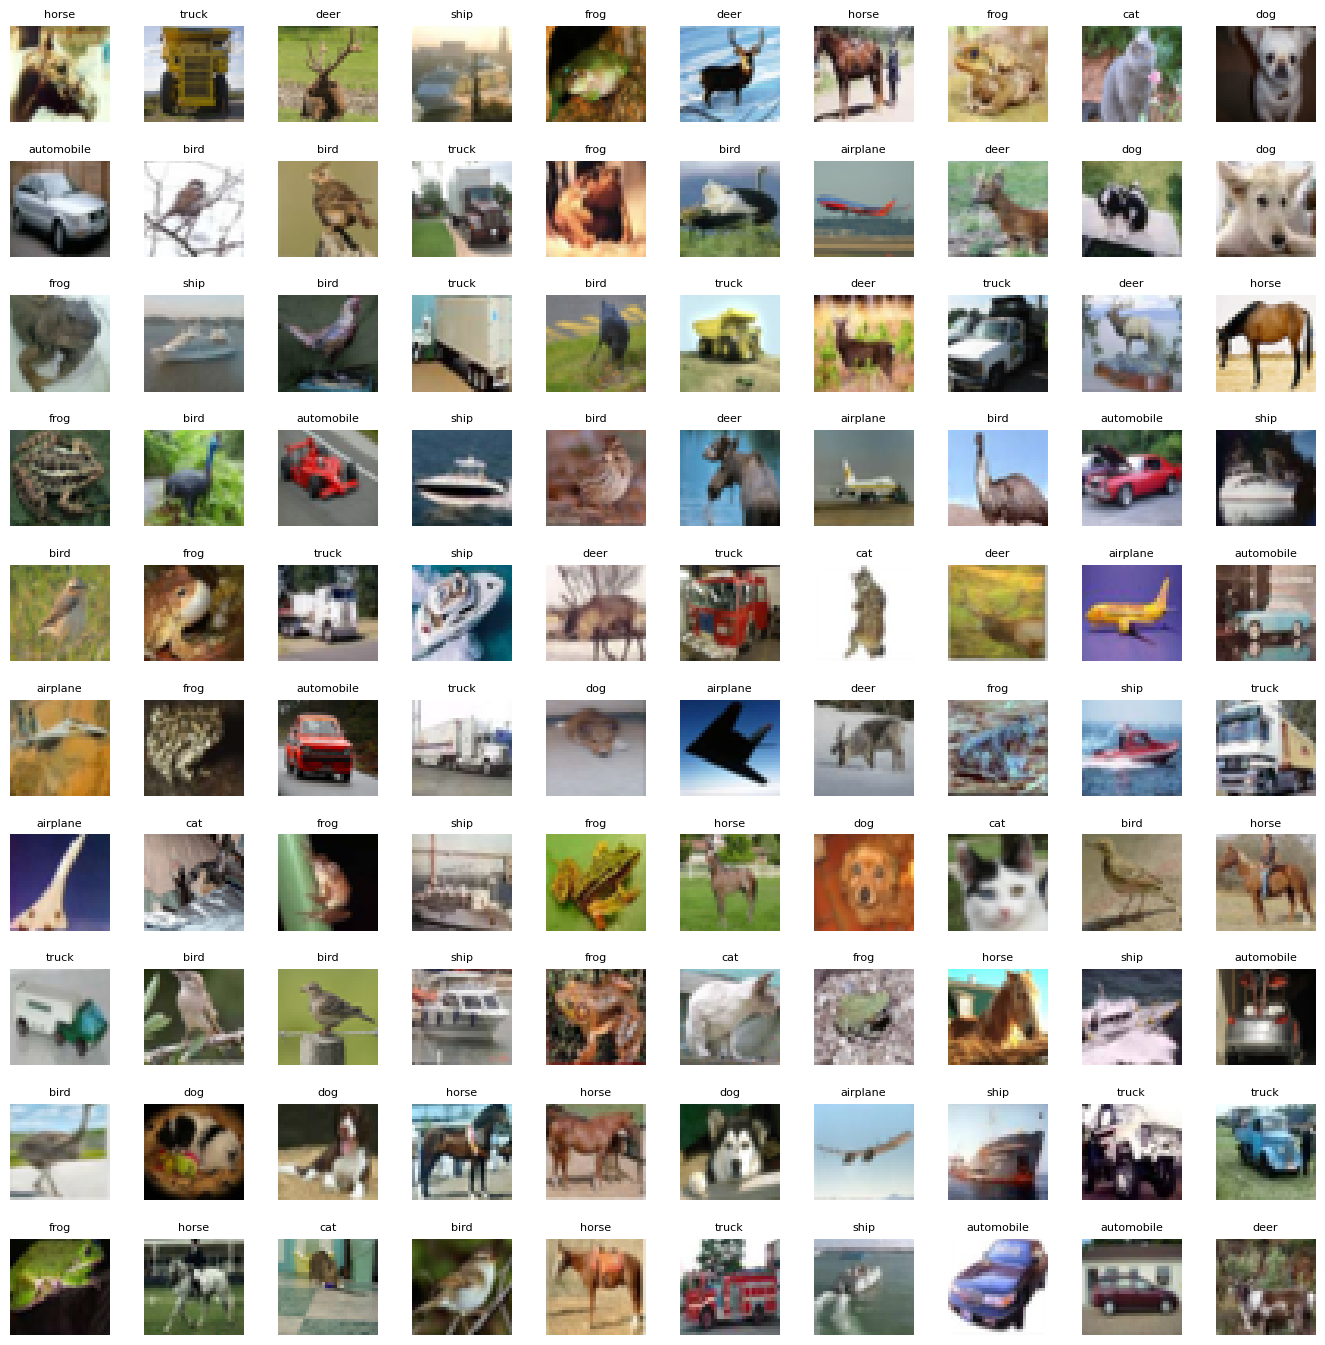

In [3]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [4]:
X_test.shape


(10000, 32, 32, 3)

In [5]:
X_train.shape


(50000, 32, 32, 3)

In [6]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)


In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


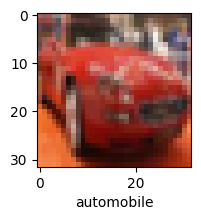

In [11]:
plot_sample(X_train, y_train, 5)


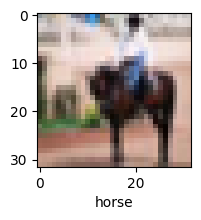

In [12]:
plot_sample(X_train, y_train, 11)


In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [14]:
ann = models.Sequential([
 layers.Flatten(input_shape=(32, 32, 3)),  # Reshape the input shape to (32, 32, 3)
 layers.Dense(100, activation='relu'),
 layers.Dense(50, activation='relu'),
 layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)


/home/ahmedalaa/.local/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


2024-05-16 03:03:02.671906: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2582 - loss: 2.0247
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3611 - loss: 1.7770
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4051 - loss: 1.6719
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4214 - loss: 1.6195
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4289 - loss: 1.5908


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification report : \n', classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
classification report : 
               precision    recall  f1-score   support

           0       0.45      0.55      0.50      1000
           1       0.62      0.46      0.53      1000
           2       0.31      0.19      0.24      1000
           3       0.33      0.24      0.28      1000
           4       0.35      0.45      0.40      1000
           5       0.44      0.28      0.34      1000
           6       0.43      0.55      0.48      1000
           7       0.50      0.47      0.49      1000
           8       0.49      0.66      0.57      1000
           9       0.47      0.58      0.52      1000

    accuracy                           0.44     10000
   macro avg       0.44      0.44      0.43     10000
weighted avg       0.44      0.44      0.43     10000



In [16]:
cnn = models.Sequential([
 layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
 layers.MaxPooling2D((2,2)),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='softmax'),
])


/home/ahmedalaa/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=25)

Epoch 1/25


2024-05-16 03:04:00.064147: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.3924 - loss: 1.6775
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5986 - loss: 1.1386
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6566 - loss: 0.9834
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.6922 - loss: 0.8909
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7128 - loss: 0.8186
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7287 - loss: 0.7795
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7480 - loss: 0.7307
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7638 - loss: 0.6833
Epoch 9/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7753 - loss: 0.6445
Epoch 10/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7836 - loss: 0.6128
Epoch 11/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7978 - loss: 0.5779
Epoch 12/25
1563/15

In [18]:
cnn.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6713 - loss: 1.3889


[1.3850494623184204, 0.678600013256073]

In [19]:
y_pred = cnn.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [20]:
y_pred[:5]


array([[1.1230229e-06, 2.0908271e-07, 1.4622696e-04, 9.9893171e-01,
        1.6130242e-07, 4.7840830e-04, 4.3221659e-04, 7.4591262e-12,
        1.0011065e-05, 2.5948946e-11],
       [3.2179141e-03, 2.7877293e-03, 4.6750742e-10, 2.8059004e-09,
        1.8895564e-10, 1.9062677e-12, 1.5334319e-14, 6.2465582e-13,
        9.9398935e-01, 4.8863708e-06],
       [1.0342600e-02, 8.8909322e-01, 2.6424055e-04, 1.3110630e-04,
        2.6397379e-06, 4.6515087e-08, 5.8564448e-05, 3.4788281e-03,
        9.6366473e-02, 2.6230674e-04],
       [9.9456841e-01, 4.9377508e-03, 1.8521565e-05, 5.1236378e-07,
        1.8689157e-06, 1.0889276e-10, 7.5243173e-07, 2.5371031e-07,
        4.7104666e-04, 6.7889869e-07],
       [1.1896760e-09, 1.3844295e-06, 4.5593125e-01, 2.2398552e-01,
        9.8498754e-02, 1.0602877e-03, 2.2052263e-01, 4.4564228e-09,
        1.4412512e-07, 5.0371383e-09]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 8, 1, 0, 2]

In [22]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

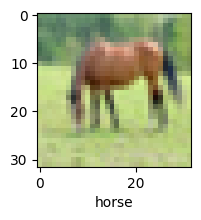

In [23]:
plot_sample(X_test, y_test,60)


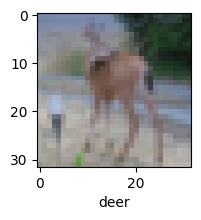

In [24]:
plot_sample(X_test, y_test, 100)


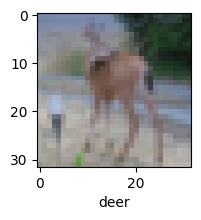

In [25]:
plot_sample(X_test, y_test, 100)


In [30]:
cnn.save('cnn_model.keras')


In [31]:
ann.save('ann_model.keras')
